# Missing Data Handling:

### REsources:

- http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns

## Missing Data Sources:

missing data means some data is not presented for some reason. there are some sources of the missing data, such as: the data is not existed or may be it is existed but not acquired.
However, in Pandas, _Reindexing_ is another source of missing data.

In [6]:
df = pd.DataFrame(np.random.randint(0, 10, (5,3)),
                 index=['a', 'c', 'e', 'f', 'h'],
                 columns=['one', 'two', 'three'])
df

,one,two,three
a,7,4,0
c,7,8,2
e,6,6,8
f,7,6,1
h,7,8,5


__API__

__*df.reindex(index=['index_list'])*__

In [8]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three
a,7.0,4.0,0.0
b,NaN,NaN,NaN
c,7.0,8.0,2.0
d,NaN,NaN,NaN
e,6.0,6.0,8.0
f,7.0,6.0,1.0
g,NaN,NaN,NaN
h,7.0,8.0,5.0


## Missing Data Values:

The default missing data in pandas is __NaN__ but sometimes __None__ appears as missing data.

__API:__

__*df.isnull()*__
__*S.isnull()*__

__*df.notnull()*__
__*S.nonull()*__

In [14]:
df2

,one,two,three
a,7.0,4.0,0.0
b,NaN,NaN,NaN
c,7.0,8.0,2.0
d,NaN,NaN,NaN
e,6.0,6.0,8.0
f,7.0,6.0,1.0
g,NaN,NaN,NaN
h,7.0,8.0,5.0


In [10]:
pd.isnull(df2.one)

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [12]:
df2.one.notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: one, dtype: bool

In [13]:
df2.isnull()

,one,two,three
a,False,False,False
b,True,True,True
c,False,False,False
d,True,True,True
e,False,False,False
f,False,False,False
g,True,True,True
h,False,False,False


__*Warning*__

in python and numpy __nan__ is not comparable, but __None__ is

In [16]:
np.nan == np.nan

False

In [17]:
None == None

True

In [15]:
df2['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

## DateTimes:

__NaT__ represents missing data for Datetimes.

In [18]:
df2 = df.copy()
df2['timestamp'] = pd.Timestamp('20120101')
df2

,one,two,three,timestamp
a,7,4,0,2012-01-01
c,7,8,2,2012-01-01
e,6,6,8,2012-01-01
f,7,6,1,2012-01-01
h,7,8,5,2012-01-01


In [20]:
df2.ix[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
df2

,one,two,three,timestamp
a,NaN,4,0,NaT
c,NaN,8,2,NaT
e,6.0,6,8,2012-01-01
f,7.0,6,1,2012-01-01
h,NaN,8,5,NaT


In [21]:
df2.get_dtype_counts()

datetime64[ns]    1
float64           1
int32             2
dtype: int64

## Inserting Missing data:

The actual missing value is chosen based on the dtype.

numeric containers will always use __NaN__

datetime containers will always use __NaT__

In [22]:
s = pd.Series([1,2,3])
s

0    1
1    2
2    3
dtype: int64

In [24]:
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [29]:
s = pd.Series(['a', 'b', 'c'])
s.loc[0] = None
s.loc[1] = np.nan
s

0    None
1     NaN
2       c
dtype: object

In [31]:
s.isnull()

0     True
1     True
2    False
dtype: bool

## Calculations with missing data:

Missing values naturally propagate throuhg arithmatic operaions between pandas object

In [74]:
a = pd.DataFrame(np.random.randint(0,10, (5,2)),
                index=['a','c','e','f','h'],
                columns=['one', 'two'])
a.one.loc[0:2] = np.nan
a

,one,two
a,NaN,7
c,NaN,6
e,0.0,8
f,7.0,6
h,6.0,3


In [75]:
b = pd.DataFrame(np.random.randint(0,10, (5,3)),
                index=['a','c','e','f','h'],
                columns=['one', 'two', 'three'])
b.one.ix[[0,1,4]] = np.nan
b

,one,two,three
a,NaN,1,9
c,NaN,6,4
e,5.0,7,2
f,4.0,9,7
h,NaN,8,5


In [76]:
a+b

,one,three,two
a,NaN,NaN,8
c,NaN,NaN,12
e,5.0,NaN,15
f,11.0,NaN,15
h,NaN,NaN,11



- When summing data, NA (missing) values will be treated as zero
- If the data are all NA, the result will be NA
- mean drop out NA
- Methods like cumsum and cumprod ignore NA values, but preserve them in the resulting arrays


In [110]:
df = pd.DataFrame(np.random.randint(0, 10, (5,3)),
                 index=['a', 'c', 'e', 'f', 'h'],
                 columns=['one', 'two', 'three'])
df.one.iloc[[1,3]] = None
df.two.ix[4] = None
df

,one,two,three
a,7.0,1.0,0
c,NaN,4.0,4
e,0.0,0.0,2
f,NaN,1.0,3
h,8.0,NaN,2


In [111]:
df.one.sum()

15.0

In [112]:
df.mean(axis=1)

a    2.666667
c    4.000000
e    0.666667
f    2.000000
h    5.000000
dtype: float64

In [113]:
df.cumsum()

,one,two,three
a,7.0,1.0,0.0
c,NaN,5.0,4.0
e,7.0,5.0,6.0
f,NaN,6.0,9.0
h,15.0,NaN,11.0


## NA values in Groupby

in consistent with R, NA groups are excluded in groupby

In [115]:
df

,one,two,three
a,7.0,1.0,0
c,NaN,4.0,4
e,0.0,0.0,2
f,NaN,1.0,3
h,8.0,NaN,2


In [117]:
df.groupby('one').mean()

,two,three
one,,
0.0,0.0,2
7.0,1.0,0
8.0,NaN,2


## Cleaning / filling missing data

__API:__

__*df.fillna(method= ,limit= )*__

__*S.fillna(method= ,limit= )*__


| method | Action| Eqivalent API |
|-------:|------:| -------------:|
| bfill / backfill | Fill values backward| bfill() |
| pad / ffill| Fill values Forward| ffill() |

In [147]:
df = pd.DataFrame(np.random.randint(0,10,(5,3)),
                 index=['a','b','c','d','e'],
                 columns=['one','two','three'])
df['four'] = 'bar'
df['timestamp'] = pd.Timestamp('20170101')
df.one.ix[[0,1,4]] = None
df.timestamp.ix[[0,1,4]] = None
df

,one,two,three,four,timestamp
a,NaN,3,7,bar,NaT
b,NaN,9,9,bar,NaT
c,1.0,9,4,bar,2017-01-01
d,5.0,3,0,bar,2017-01-01
e,NaN,6,3,bar,NaT


In [148]:
df.fillna(0)

,one,two,three,four,timestamp
a,0.0,3,7,bar,1970-01-01
b,0.0,9,9,bar,1970-01-01
c,1.0,9,4,bar,2017-01-01
d,5.0,3,0,bar,2017-01-01
e,0.0,6,3,bar,1970-01-01


In [149]:
df['four'].fillna('missing')

a    bar
b    bar
c    bar
d    bar
e    bar
Name: four, dtype: object

In [152]:
df.one.fillna(method='bfill')

a    1.0
b    1.0
c    1.0
d    5.0
e    NaN
Name: one, dtype: float64

In [153]:
df.one.bfill(limit=1)

a    NaN
b    1.0
c    1.0
d    5.0
e    NaN
Name: one, dtype: float64

In [151]:
df.one.fillna(method='ffill')

a    NaN
b    NaN
c    1.0
d    5.0
e    5.0
Name: one, dtype: float64

## Filling with pandas object:

You can also fillna using a __*dict*__ or __*Series*__ that is alignable. The labels of the dict or index of the Series must match the columns of the frame you wish to fill. The use case of this is to fill a DataFrame with the mean of that column.

In [174]:
df = pd.DataFrame(np.random.randint(0,10,(10,3)),
                 columns=['A', 'B', 'C'])
df.iloc[3:5,0] = None
df.iloc[4:6,1] = None
df.iloc[5:8,2] = None
df

,A,B,C
0,1.0,4.0,5.0
1,9.0,2.0,4.0
2,4.0,2.0,0.0
3,NaN,8.0,2.0
4,NaN,NaN,6.0
5,8.0,NaN,NaN
6,5.0,0.0,NaN
7,9.0,6.0,NaN
8,6.0,9.0,4.0
9,3.0,2.0,3.0


In [175]:
df.mean()

A    5.625000
B    4.125000
C    3.428571
dtype: float64

In [176]:
# here each NaN is repplaced by its column mean value
df.fillna(df.mean())

,A,B,C
0,1.000,4.000,5.000000
1,9.000,2.000,4.000000
2,4.000,2.000,0.000000
3,5.625,8.000,2.000000
4,5.625,4.125,6.000000
5,8.000,4.125,3.428571
6,5.000,0.000,3.428571
7,9.000,6.000,3.428571
8,6.000,9.000,4.000000
9,3.000,2.000,3.000000


In [177]:
df.mean()['B':'C']

B    4.125000
C    3.428571
dtype: float64

In [178]:
# here only NaN values in columns B and C are replaced with their 
# column mean value
df.fillna(df.mean()['B':'C'])

,A,B,C
0,1.0,4.000,5.000000
1,9.0,2.000,4.000000
2,4.0,2.000,0.000000
3,NaN,8.000,2.000000
4,NaN,4.125,6.000000
5,8.0,4.125,3.428571
6,5.0,0.000,3.428571
7,9.0,6.000,3.428571
8,6.0,9.000,4.000000
9,3.0,2.000,3.000000


Same result as above, but is aligning the ‘fill’ value which is a Series in this case.

__API:__

__*df.where(cond, other)*__

Return an object of same shape as self and whose corresponding entries are from self where cond is True and otherwise are from other.

In [179]:
df.where(pd.notnull(df), df.mean(), axis='columns')

,A,B,C
0,1.000,4.000,5.000000
1,9.000,2.000,4.000000
2,4.000,2.000,0.000000
3,5.625,8.000,2.000000
4,5.625,4.125,6.000000
5,8.000,4.125,3.428571
6,5.000,0.000,3.428571
7,9.000,6.000,3.428571
8,6.000,9.000,4.000000
9,3.000,2.000,3.000000


## Dropping axis labels with missing data: dropna

It's possible exclude labels with missing data using __*dropna*__

__API__

__*df.dropna(axis=)*__

__*S.dropna(axis=)*__


In [186]:
df = pd.DataFrame(np.random.randint(0,10,(5,3)),
                 columns=['A', 'B', 'C'])
df['C'].ix[[1,3]] = None
df

,A,B,C
0,0,0,0.0
1,3,8,NaN
2,3,5,8.0
3,9,0,NaN
4,0,3,0.0


In [187]:
df.dropna(axis=1)

,A,B
0,0,0
1,3,8
2,3,5
3,9,0
4,0,3


In [188]:
df.dropna(axis=0)

,A,B,C
0,0,0,0.0
2,3,5,8.0
4,0,3,0.0


## Interpolation:

It's possible to interpolate Dataframe and series to replace missing data with new interpolated values.

__API__

__*df.interpolate(method=)*__

__*S.interpolate(method=)*__

the default method is linear interpolation.

In [233]:
ts = pd.DataFrame(np.random.randint(0, 10, 100),
                 index=pd.date_range('20120101', periods=100, freq='M'),
                 columns=['Ts'])
ts[1:7] = None
ts.head(10)

,Ts
2012-01-31,7.0
2012-02-29,NaN
2012-03-31,NaN
2012-04-30,NaN
2012-05-31,NaN
2012-06-30,NaN
2012-07-31,NaN
2012-08-31,6.0
2012-09-30,1.0
2012-10-31,7.0


In [235]:
# number of non-null values in dataframe
ts.count()

Ts    94
dtype: int64

In [238]:
ts.interpolate().count()

Ts    100
dtype: int64

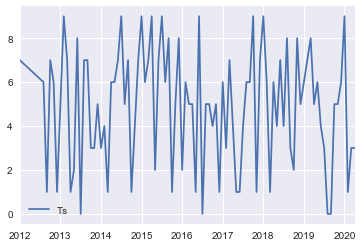

In [239]:
ts.interpolate().plot()

### Index aware interpolation:

for index aware interpolation use __method__ keyword:

__method=time'__

In [241]:
ts.head()

,Ts
2012-01-31,7.0
2012-02-29,NaN
2012-03-31,NaN
2012-04-30,NaN
2012-05-31,NaN


In [242]:
ts.interpolate().head()

,Ts
2012-01-31,7.000000
2012-02-29,6.857143
2012-03-31,6.714286
2012-04-30,6.571429
2012-05-31,6.428571


In [243]:
ts.interpolate(method='time').head()

,Ts
2012-01-31,7.000000
2012-02-29,6.863850
2012-03-31,6.718310
2012-04-30,6.577465
2012-05-31,6.431925


__method='values'__

In [254]:
ser = pd.DataFrame(np.random.randint(0,10,5),
                  index=[0.0, 1.0, 5.0, 10.0, 20.0],
                  columns=['A'])
ser.ix[1] = None
ser

,A
0.0,8.0
1.0,NaN
5.0,3.0
10.0,8.0
20.0,2.0


In [255]:
ser.interpolate()

,A
0.0,8.0
1.0,5.5
5.0,3.0
10.0,8.0
20.0,2.0


In [256]:
ser.interpolate(method='values')

,A
0.0,8.0
1.0,7.0
5.0,3.0
10.0,8.0
20.0,2.0


## Interpolation using Scipy modules:

It's possible to use interpolations methods in sipy

- If you are dealing with a time series that is growing at an increasing rate, __method='quadratic'__ may be appropriate.

- If you have values approximating a cumulative distribution function, then __method='pchip'__ should work well.

- To fill missing values with goal of smooth plotting, use __method='akima'__.


In [2]:
import scipy

In [4]:
df = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],
                   'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
df

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [5]:
df.interpolate(method='pchip')#.plot()

,A,B
0,1.00000,0.250000
1,2.10000,0.672808
2,3.43454,1.928950
3,4.70000,4.000000
4,5.60000,12.200000
5,6.80000,14.400000


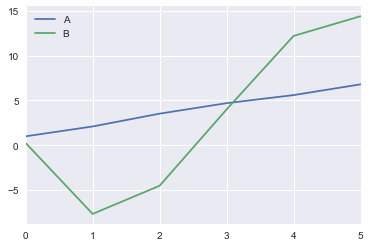

In [263]:
df.interpolate(method='barycentric').plot()

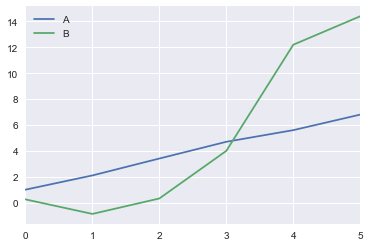

In [264]:
df.interpolate(method='akima').plot()

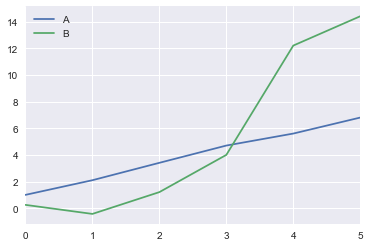

In [266]:
df.interpolate(method='spline', order=2).plot()

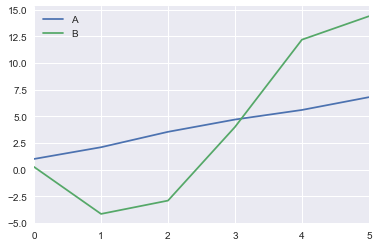

In [268]:
df.interpolate(method='polynomial', order=2).plot()

### Compare different methods

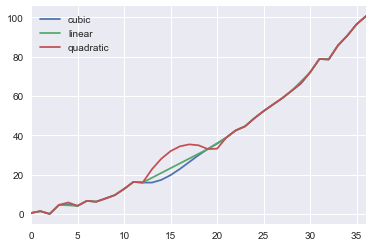

In [272]:
np.random.seed(2)
ser = pd.Series(np.arange(1, 10.1, .25)**2 + np.random.randn(37))
bad = np.array([4, 13, 14, 15, 16, 17, 18, 20, 29])
ser[bad] = np.nan
methods = ['linear', 'quadratic', 'cubic']
df = pd.DataFrame({m: ser.interpolate(method=m) for m in methods})
df.plot()

### Interpolating at new indexes:

In [279]:
ser = pd.Series(np.sort(np.random.uniform(size=100)))
new_index = ser.index | pd.Index([49.25, 49.5, 49.75, 50.25, 50.5, 50.75])
ser = ser.reindex(new_index)
ser = ser.interpolate(method='pchip')
ser[49:51]

49.00    0.444682
49.25    0.444898
49.50    0.445087
49.75    0.445329
50.00    0.445702
50.25    0.447377
50.50    0.450580
50.75    0.453977
51.00    0.456232
dtype: float64

### Interpolation Limits:

Like fill methods in pandas, interpolate also has __limit__ keyword

here it's possible determine filling the NaN values after, before or both after and before of the real values. for this, __limit_direction__ is provided with possible keywords of __backward__, __forward__, __both__

In [280]:
ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13])
ser

0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6    13.0
dtype: float64

In [281]:
ser.interpolate(limit=2)

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5     NaN
6    13.0
dtype: float64

In [282]:
ser.interpolate(limit=1, limit_direction='forward')

0     NaN
1     NaN
2     5.0
3     7.0
4     NaN
5     NaN
6    13.0
dtype: float64

In [283]:
ser.interpolate(limit=1, limit_direction='backward')

0     NaN
1     5.0
2     5.0
3     NaN
4     NaN
5    11.0
6    13.0
dtype: float64

In [284]:
ser.interpolate(limit=1, limit_direction='both')

0     NaN
1     5.0
2     5.0
3     7.0
4     NaN
5    11.0
6    13.0
dtype: float64

## Replacing Generic Values

Often times we want to replace arbitrary values with other values. New in v0.8 is the __*replace*__ method in Series/DataFrame that provides an efficient yet flexible way to perform such replacements.

__API:__

__df.replace()__

__S.replace()__

In [285]:
ser = pd.Series([0.0, 1.0, 2.0, 3.0, 4.0])
ser

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [286]:
ser.replace(0, 5)

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

### Using List

In [287]:
ser.replace([0,1,2,3,4], [5,6,7,8,9])

0    5.0
1    6.0
2    7.0
3    8.0
4    9.0
dtype: float64

### Using dictionary

In [288]:
ser = pd.Series([0,1,2,3,4,5])
ser.replace({0:10, 3:100})

0     10
1      1
2      2
3    100
4      4
5      5
dtype: int64

In [289]:
df = pd.DataFrame({'A': [0,1,2,3,4],
                   'B': [5,6,7,8,9]})
df

,A,B
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [290]:
df.replace({0: 'a', 6:'b'})

,A,B
0,a,5
1,1,b
2,2,7
3,3,8
4,4,9


In [294]:
df.replace({'A':1, 'B':7}, 100)

,A,B
0,0,5
1,100,6
2,2,100
3,3,8
4,4,9


In [299]:
ser = pd.Series([1,2,3,4,5])
ser

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [301]:
ser.replace([2,3,5], method='pad')

0    1
1    1
2    1
3    4
4    4
dtype: int64

## String / Regular Expression Replacement

In [305]:
d = {'a': list(range(4)),
     'b': list('ab..'),
     'c': ['a', 'b', np.nan, 'd']}
df = pd.DataFrame(d)
df

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


(str > str)

In [306]:
df.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


{regex > regex)

In [313]:
df.replace(r'\s*\.\s*', np.nan, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


(list > list)

In [314]:
df.replace(['a', '.'], ['A', np.nan])

,a,b,c
0,0,A,A
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


(regex > list)

In [318]:
df.replace([r'\.', r'(a)'], ['dot', '\1stauff'], regex=True)

,a,b,c
0,0,stauff,stauff
1,1,b,b
2,2,dot,NaN
3,3,dot,d


(dict > dict)

In [319]:
df.replace({'b': '.'}, {'b': np.nan})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [320]:
df.replace({'b': r'\s*\.\s*'}, {'b': np.nan}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


passing nested dictionaries of regex

In [321]:
df.replace({'b': {'b': r''}}, regex=True)

,a,b,c
0,0,a,a
1,1,,b
2,2,.,NaN
3,3,.,d


In [322]:
df.replace(regex={'b':{r'\s*\.\s*': np.nan}})

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


(dict of regex > dict of regex)

In [325]:
df.replace({'b': r'\s*(\.)\s*'}, {'b':r'\1ty'}, regex=True)

,a,b,c
0,0,a,a
1,1,b,b
2,2,.ty,NaN
3,3,.ty,d


You can pass a list of regular expressions, of which those that match will be replaced with a scalar (list of regex -> regex)

In [328]:
df.replace([r'\s*\.\s*', r'a|b'], np.nan, regex=True)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


All of the regular expression examples can also be passed with the to_replace argument as the regex argument. In this case the value argument must be passed explicitly by name or regex must be a nested dictionary. The previous example, in this case, would then be

In [329]:
df.replace(regex=[r'\s*\.\s*', r'a|b'], value=np.nan)

,a,b,c
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,d


## Numeric Replacement

In [332]:
df = pd.DataFrame(np.random.randint(0,10,(10, 2)))
df

,0,1
0,6,5
1,2,2
2,5,1
3,6,8
4,0,7
5,1,5
6,0,4
7,0,8
8,7,9
9,0,2


In [333]:
df[np.random.rand(df.shape[0]) > 0.5] = 1.5
df

,0,1
0,6.0,5.0
1,2.0,2.0
2,1.5,1.5
3,6.0,8.0
4,1.5,1.5
5,1.5,1.5
6,1.5,1.5
7,1.5,1.5
8,7.0,9.0
9,1.5,1.5


In [335]:
df.replace(1.5, np.nan)

,0,1
0,6.0,5.0
1,2.0,2.0
2,NaN,NaN
3,6.0,8.0
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,7.0,9.0
9,NaN,NaN


In [337]:
df00 = df.values[0,0]
df.replace([1.5, df00], [np.nan, 'aa'])

,0,1
0,aa,5.0
1,2,2.0
2,NaN,NaN
3,aa,8.0
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,7,9.0
9,NaN,NaN


# Akmanlp walkthrough

In [8]:
df = pd.read_excel('data/1033-program-foia-may-2014.xlsx')
df.head()

,State,County,NSN,Item Name,Quantity,UI,Acquisition Cost,Ship Date
0,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30 00:00:00
1,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30 00:00:00
2,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30 00:00:00
3,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30 00:00:00
4,AK,ANCHORAGE,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",1,Each,499.0,2012-08-30 00:00:00


### getting some statistical description of data

In [9]:
df.describe()

,Quantity,Acquisition Cost
count,73028.000000,7.302800e+04
mean,15.006792,7.967575e+03
std,384.623930,1.972932e+05
min,1.000000,0.000000e+00
25%,1.000000,5.871000e+01
50%,1.000000,2.000000e+02
75%,5.000000,4.990000e+02
max,91000.000000,1.800000e+07


### getting data type info

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73028 entries, 0 to 73027
Data columns (total 8 columns):
State               73028 non-null object
County              73028 non-null object
NSN                 72983 non-null object
Item Name           71732 non-null object
Quantity            73028 non-null int64
UI                  73028 non-null object
Acquisition Cost    73028 non-null float64
Ship Date           73028 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 4.5+ MB


In [14]:
df.count()

State               73028
County              73028
NSN                 72983
Item Name           71732
Quantity            73028
UI                  73028
Acquisition Cost    73028
Ship Date           73028
dtype: int64